**Homework Day 8 - Data Cleansing with Python**

**Author: Ahmad Ichsan Baihaqi**

**Email: ahmadichsanbaihaqi@gmail.com**

Intro (personal note):

Data profiling is a powerful way to analyze millions of rows of data to identify errors, missing information, and any anomalies that may affect the quality of information. By profiling data, you get to see all the underlying problems with your data that you would otherwise not be able to see.

Data cleansing is the second step after profiling. Once you identify the flaws within your data, you can take the steps necessary to clean the flaws[1](https://dataladder.com/data-profiling-vs-data-cleansing/).

In this task, I would like to do profiling and data cleansing using [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn) dataset. There are several points that I'd like to handle:

1. Column Inconsistency
2. Missing Value
3. Categorical Data Encoding
4. Anomalies/Outliers

**Data Profiling**

According to data set source, each row of this data represents a unique customer. The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

In [200]:
## Import Lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [201]:
## Import Data

data = pd.read_csv('Telco Customer Churn.csv')

# data.describe()
# data.dtypes.value_counts()

**Import Data**

In the above code, we successfully load our data set and stored in a variable named ```data```. First thing that I realized, this data set have inconsistency in column name. Now, let's find out all of the column name and how many different styling name this data set has.

In [202]:
## Data Profiling - Column Name Inconsistency

col_names = list(data.columns)
col_names

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

**Data Profiling - Column Name Inconsistency**

Based on above exploration, we found that some of them using PascalCase (e.g. SeniorCitizen, TechSupport), some of them using camelCase (e.g. customerID) and lowercase (e.g. tenure). In order create consistency, I'd like to uniform all of the column into PascalCase

In [203]:
## Data Cleansing - Column Name Inconsistency
import stringcase

## Convert into PascalCase
data = data.rename(columns = lambda x: stringcase.pascalcase(x))

col_names = list(data.columns)
col_names

['CustomerID',
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

**Data Profiling - Missing Value**

Next step, find missing value in a column.

In [204]:
## Data Profiling - Missing Value

def find_missing_value(data_frame):
    missing_data = data_frame.isnull().sum(axis=0).reset_index()
    missing_data.columns = ['variable', 'missing values']
    missing_data['filling factor (%)'] = (data_frame.shape[0]-missing_data['missing values'])/data_frame.shape[0]*100
    return missing_data.sort_values('filling factor (%)').reset_index(drop = True)

find_missing_value(data)

,variable,missing values,filling factor (%)
0,CustomerID,0,100.0
1,MonthlyCharges,0,100.0
2,PaymentMethod,0,100.0
3,PaperlessBilling,0,100.0
4,Contract,0,100.0
5,StreamingMovies,0,100.0
6,StreamingTV,0,100.0
7,TechSupport,0,100.0
8,DeviceProtection,0,100.0
9,TotalCharges,0,100.0


**Data Profiling - Missing Value**

Based on above observation, there is no missing value. But, are you sure? [Here](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b) is reference for below code.

In [205]:
## Data Profiling - Missing Value
## Now, let's try to re-assign data variable with different way of import the dataset
## By doing this, our empty/whitespace value will be converted to NA

missing_values = [" "]
data = pd.read_csv("Telco Customer Churn.csv", na_values = missing_values)
data.columns = col_names

## Now, let's take a look again if there is any missing value
find_missing_value(data)

,variable,missing values,filling factor (%)
0,TotalCharges,11,99.843817
1,CustomerID,0,100.000000
2,MonthlyCharges,0,100.000000
3,PaymentMethod,0,100.000000
4,PaperlessBilling,0,100.000000
5,Contract,0,100.000000
6,StreamingMovies,0,100.000000
7,StreamingTV,0,100.000000
8,TechSupport,0,100.000000
9,DeviceProtection,0,100.000000


**Data Profiling - Missing Value**

Look, now we found that TotalCharges feature has 11 missing value. What we should do to handle missing value in TotalCharges feature? In general, we can do two things to handle the missing value:

1. Drop the row that has missing value in one of the column
2. Fill the missing value column with several options:
   a. mean
   b. median
   c. mode
   d. other "reasonable" value

But, drop a row, most of the time, is not recommended. Why? More often than not, Missing Values actually represent major bits & pieces of information[1](https://towardsdatascience.com/few-reasons-to-not-drop-missing-values-575a8d2b6a41).

Then, another options we have is to fill the missing value, TotalCharges. But, how we could decide what value to be set to replace the missing value in TotalCharges? Let's take a look at the definition of TotalCharges feature.

TotalCharges is a feature that represent the total amount charged to the customer. Now, let's see all data where the TotalCharges is missing to obtain more insight.

In [206]:
## Data Profiling - Missing Value

null_data = data[data.isnull().any(axis=1)]
# null_data

In [207]:
null_data[['Tenure', 'TotalCharges']]

,Tenure,TotalCharges
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


**Data Profiling - Missing Value**

Based on above observation, all TotalCharges with missing value has 0 for their tenure value. Tenure is the number of months the customer has stayed with the company. So, it means, TotalCharges with missing value is because the customer is not charged yet. So, the best way to handle TotalCharges missing value is to fill it with zero (0).

In [208]:
## Data Cleansing - Missing Value

data['TotalCharges'].fillna(value = 0.00, inplace = True)

data.loc[data['TotalCharges'] == 0]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


**Data Profiling - Categorical Data Encoding**

Why we need to encoding categorical data? Because, Machine learning models require all input and output variables to be numeric[1](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/).

In [209]:
## Data Profiling - Categorical Data Encoding

print(data.dtypes.value_counts())
data.dtypes

object     17
int64       2
float64     2
dtype: int64


CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Data Profiling - Categorical Data Encoding**

Based on above code, we have:
1. 17 columns which are objects (categorical data)
2. 2 columns which are of int data type
3. 2 columns which are of float data type

Now, let's encode these 17 feature of categorical data

In [185]:
## Data Cleansing - Categorical Data Encoding
from sklearn.preprocessing import LabelEncoder

def label_encoder(list_column, data_set):
    encoder = LabelEncoder()
    
    copied_data = data_set
    
    for item in list_column:
        copied_data[item] = encoder.fit_transform(copied_data[item])
        
    return copied_data

list_encode = [item for item in col_names if item != 'CustomerID']

data = label_encoder(list_encode, data)
data.head(5)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,75,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,3625,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,537,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,3571,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,675,1


**Data Profiling - Categorical Data Encoding**

In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations. Therefore, if you have any data point that is more than 3 times the standard deviation, then those points are very likely to be anomalous or outliers[1](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623).

In [186]:
## Data Profiling - Anomalies/Outliers

def find_anomalies(data_set):
    # define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data_set)
    data_mean = np.mean(data_set)
    anomaly_cut_off = data_std * 3
    
    lower_limit = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off

    for anomaly in data_set:
        if anomaly > upper_limit or anomaly < lower_limit:
            anomalies.append(anomaly)
    return anomalies

def find_data_set_anomalies(data_set, columns):
    result = []
    
    for item in columns:
        result.append(find_anomalies(data_set[item]))
        
    return result

def find_upper_outliers(data_set):
    q1 = data_set.quantile(0.25)
    q3 = data_set.quantile(0.75)
    iqr = q3 - q1
    
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = [item for item in data_set if item > upper_bound]
    
    return outliers

def find_lower_outliers(data_set):
    q1 = data_set.quantile(0.25)
    q3 = data_set.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    
    outliers = [item for item in data_set if item < lower_bound]
    
    return outliers

def find_data_set_upper_outliers(data_set, columns):
    result = []
    
    for item in columns:
        result.append(find_upper_outliers(data_set[item]))
        
    return result

def find_data_set_lower_outliers(data_set, columns):
    result = []
    
    for item in columns:
        result.append(find_lower_outliers(data_set[item]))
        
    return result

In [187]:
## Data Profiling - Anomalies/Outliers

numeric_column = ['MonthlyCharges', 'TotalCharges']

outlier_anomaly_result = pd.DataFrame({
    'variable': numeric_column,
    'anomalies': find_data_set_anomalies(data, numeric_column),
    'lower_outlier': find_data_set_lower_outliers(data, numeric_column),
    'upper_outlier': find_data_set_upper_outliers(data, numeric_column),
})

outlier_anomaly_result

,variable,anomalies,lower_outlier,upper_outlier
0,MonthlyCharges,[],[],[]
1,TotalCharges,[],[],[]


<AxesSubplot:>

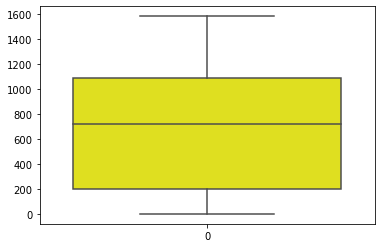

In [188]:
## Data Profiling - Anomalies/Outliers

sns.boxplot(data=data['MonthlyCharges'], color = "yellow")

<AxesSubplot:>

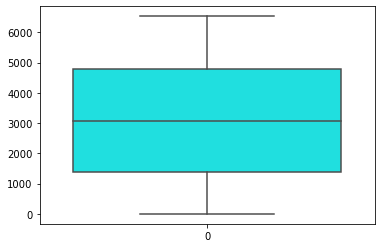

In [189]:
## Data Profiling - Anomalies/Outliers

sns.boxplot(data=data['TotalCharges'], color = "cyan")

**Data Profiling - Anomalies/Outliers**

Based on above calculation and visualization, we found out that there are no anomaly nor outlier in our dataset.